In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import os
import kagglehub # type: ignore
import shutil

# Define Paths
destination_dir = 'input'
# Assuming the dataset will always contain 'Iris.csv'
file_name = 'Iris.csv'
destination_file = os.path.join(destination_dir, file_name)

# Create destination directory
os.makedirs(destination_dir, exist_ok=True)

# Check if the file already exists
if os.path.exists(destination_file):
    print(f"File '{destination_file}' already exists. Skipping download and move.")
else:
    # Download and move to input dir
    print("Downloading dataset...")
    try:
        path = kagglehub.dataset_download("endofnight17j03/iris-classification")
        print(f"Dataset downloaded to: {path}")

        source_file = os.path.join(path, file_name)
        
        if not os.path.exists(source_file):
             raise FileNotFoundError(f"CSV file '{file_name}' not found in downloaded path: {path}")

        print(f"Moving '{source_file}' to '{destination_file}'...")
        shutil.move(source_file, destination_file)
        print("Move complete.")

    except Exception as e:
        print(f"An error occurred: {e}")

# Verify the file is in the new directory 
print("\nFiles in the 'input' directory:")
if os.path.exists(destination_dir):
    for dirname, _, filenames in os.walk(destination_dir):
        for filename in filenames:
            print(os.path.join(dirname, filename))
else:
    print("Input directory does not exist.")

File 'input\Iris.csv' already exists. Skipping download and move.

Files in the 'input' directory:
input\Iris.csv


c:\Users\kenak\Desktop\Absolutely new untouched folder\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Softmax Regression

The purporse of this notebook is to create a model using softmax regression 

What is softmax regression? 

Softmax regression is a generalization of logistic regression as to support multiclass prediction natively, thus while logistic regression would give us the probability of being in a class or not in a class for every feature in our target, softmax provides us with a single set of probabilities with our predicted class being the class with the highest probability. Softmax is recommended when the classes that we are trying to predict are mutually exclusive.

We would like to implement mini-batch gradient descent to use to train or classifier. This is similar to batch GD the only difference beign that we train on a batch of m instances in each iteration instead of the whole dataset, this is useful when implementing out of core learning and when dealing with very large datasets. We will start off with that before taking a look at our algorithm.

As to properly implement, illustrate and take advantage of minibatch learning, we will download our dataset from sklearn instead of just importing it, I guess if it is large enough it is downloaded anyway. Thus we will not directly have it in our RAM and must read from file. The dataset that I will using this on is the iris dataset which is commically small compared to other irl datasets, but the fundamentals still apply, so let us get into it.

### Custom Classes

I implemented some custom classes for the mini batch sampling and the softmax regression gradient descent, these can be viewed in

MiniBatchGD.py and MiniBatchSampler.py 

They are pretty nice pieces of code if I do say so myself. 

I will shortly go over what the code does, starting with the MiniBatchSampler class, for more details look at the respective file.

### MiniBatchSampler
The class loads a csv line by line and adds it into our mini-batch, its key features are the use of reservoir sampling to sample m instances during the first pass as we assume that we do not know the size of the datset, this is a very neat trick that assures us a random sampling. 

Additionally, we include functionality to ignore certain indices in the file, meaning that we can create a validation set to evaluate our model on, to do this requires a pass over the data, which eliminates the need for reservoir sampling, but as it is a deprecation that does not really impact performance and is just beautiful to read, we keep it in anyway. At the end of our day, our main enemy is loading the data into memory, doing multiple passes, while not particularly effecient is the tradeoff that we allowourselves in this case. Our implementation uses numpy mostly, but we do use pandas for a while once we have created the minibatch due to the ease of accessing and storing attributes of the batch such as columns, which are not used in further computation. 

Finally, our implementation assumes some attributes of the dataset are known, such as the amount and position of feature columns, all of this can be determined with a simple shell command, so this does not take away from our implementation in our opinion.

### MiniBatchGD

For the gradient descent implementation for softmax regression, our implementation follows the well-defined formulae for the calculation of the different values (instance class probabiltiies, gradient vectors). When possible, we use vectorization and matrix multiplicationinstead of loops for our calculations as to speed them up. 

Our implementation supports multiple hyperparameters, the most relevant are: early_stopping_rounds, which lets us set how many rounds without improvement we allow before stopping training, and min_delta, which sets the minimum change to validation loss to qualify as an improvement. 

Additionally, we implement a very useful utility function to plot the learning curves as to get a feel for the generalization of the model. 

The main downside to our implementation is that it does not supprot n-fold cross validation.





Epoch 1/1000 - Validation loss improved to 1.0310
Epoch 2/1000 - Validation loss improved to 0.9407
Epoch 3/1000 - Validation loss improved to 0.8553
Epoch 4/1000 - Validation loss improved to 0.7780
Epoch 5/1000 - Validation loss improved to 0.7263
Epoch 6/1000 - Validation loss improved to 0.6808
Epoch 7/1000 - Validation loss improved to 0.6413
Epoch 8/1000 - Validation loss improved to 0.6063
Epoch 9/1000 - Validation loss improved to 0.5771
Epoch 10/1000 - Validation loss improved to 0.5494
Epoch 11/1000 - Validation loss improved to 0.5272
Epoch 12/1000 - Validation loss improved to 0.5044
Epoch 13/1000 - Validation loss improved to 0.4853
Epoch 14/1000 - Validation loss improved to 0.4682
Epoch 15/1000 - Validation loss improved to 0.4529
Epoch 16/1000 - Validation loss improved to 0.4402
Epoch 17/1000 - Validation loss improved to 0.4279
Epoch 18/1000 - Validation loss improved to 0.4149
Epoch 19/1000 - Validation loss improved to 0.4045
Epoch 20/1000 - Validation loss improved

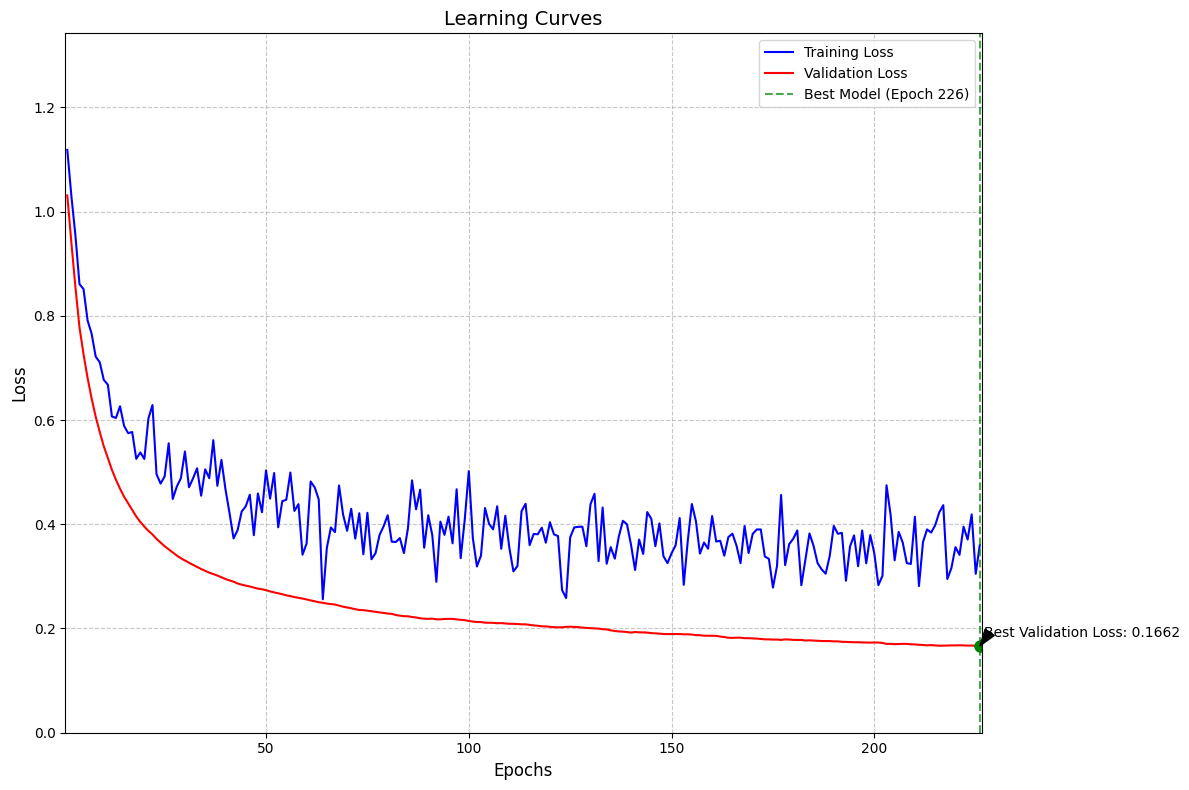

Epoch 1/1000 - Validation loss improved to 1.1765
Epoch 2/1000 - Validation loss improved to 1.1180
Epoch 3/1000 - Validation loss improved to 1.0567
Epoch 4/1000 - Validation loss improved to 0.9959
Epoch 5/1000 - Validation loss improved to 0.9509
Epoch 6/1000 - Validation loss improved to 0.9093
Epoch 7/1000 - Validation loss improved to 0.8706
Epoch 8/1000 - Validation loss improved to 0.8339
Epoch 9/1000 - Validation loss improved to 0.8021
Epoch 10/1000 - Validation loss improved to 0.7691
Epoch 11/1000 - Validation loss improved to 0.7415
Epoch 12/1000 - Validation loss improved to 0.7129
Epoch 13/1000 - Validation loss improved to 0.6882
Epoch 14/1000 - Validation loss improved to 0.6661
Epoch 15/1000 - Validation loss improved to 0.6445
Epoch 16/1000 - Validation loss improved to 0.6263
Epoch 17/1000 - Validation loss improved to 0.6092
Epoch 18/1000 - Validation loss improved to 0.5908
Epoch 19/1000 - Validation loss improved to 0.5760
Epoch 20/1000 - Validation loss improved

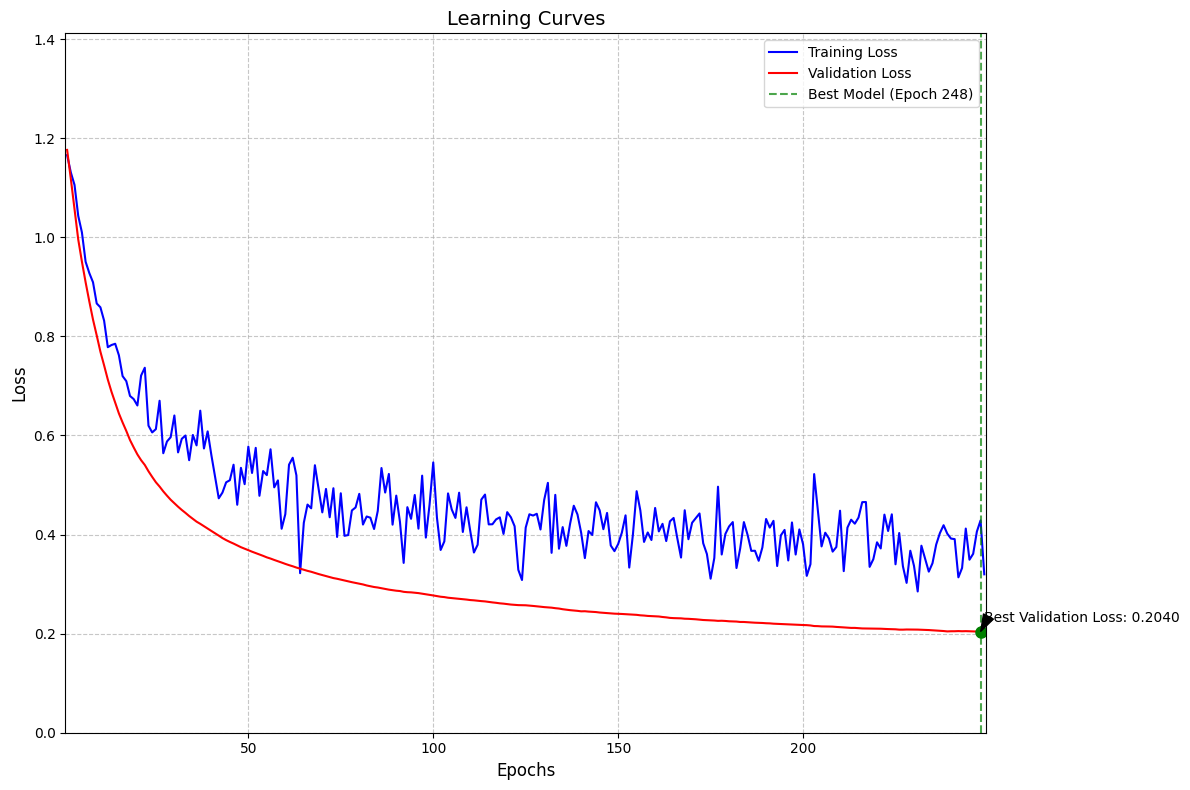

Epoch 1/1000 - Training loss improved to 1.0756
Epoch 2/1000 - Training loss improved to 0.9870
Epoch 3/1000 - Training loss improved to 0.9143
Epoch 4/1000 - Training loss improved to 0.8545
Epoch 5/1000 - Training loss improved to 0.8049
Epoch 6/1000 - Training loss improved to 0.7633
Epoch 7/1000 - Training loss improved to 0.7282
Epoch 8/1000 - Training loss improved to 0.6982
Epoch 9/1000 - Training loss improved to 0.6723
Epoch 10/1000 - Training loss improved to 0.6499
Epoch 11/1000 - Training loss improved to 0.6301
Epoch 12/1000 - Training loss improved to 0.6127
Epoch 13/1000 - Training loss improved to 0.5972
Epoch 14/1000 - Training loss improved to 0.5833
Epoch 15/1000 - Training loss improved to 0.5708
Epoch 16/1000 - Training loss improved to 0.5595
Epoch 17/1000 - Training loss improved to 0.5491
Epoch 18/1000 - Training loss improved to 0.5397
Epoch 19/1000 - Training loss improved to 0.5310
Epoch 20/1000 - Training loss improved to 0.5230
Epoch 21/1000 - Training loss

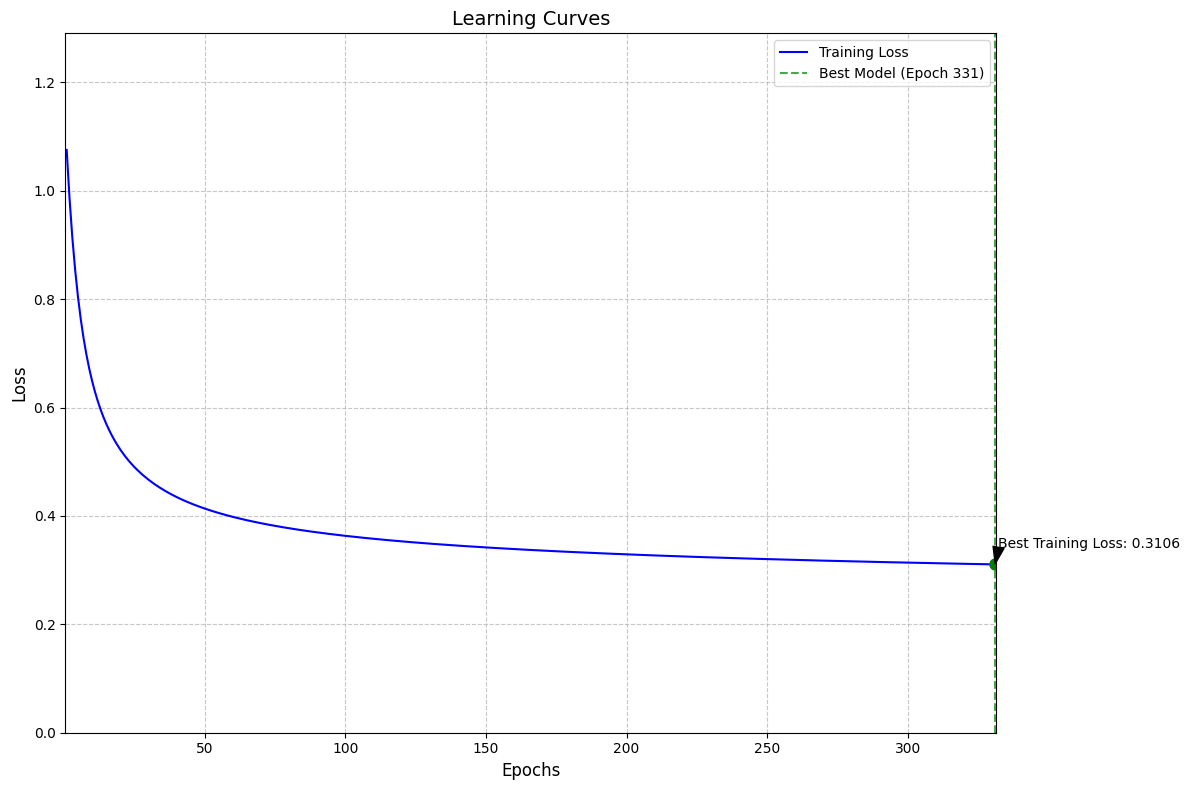

In [2]:
from MiniBatchGD import MiniBatchGD
import matplotlib.pyplot as plt # type: ignore

# Initialize classifier
# Fit classifier, the index of the target y was determined by 
# printing the head of the file, as described in the docstring
param_grid = [(0.1,50, 1000, 0.1), (0.05,50, 1000,0.1),(0.1,150,1000, 0)]

for eta, batch_size, epochs, validation_size in param_grid:
    # We use partial_fit for data transformation, so we need to define a new classifier each time 
    # to make sure our data does not leak. 
    clf = MiniBatchGD(path='input/Iris.csv')
    clf.fit(
        y_index=4, 
        lines=batch_size, 
        validation_size=validation_size,
        epochs=epochs, 
        eta=eta,
        early_stopping_rounds=10,
        min_epochs=50,
        min_delta=0.001,
        verbose=True
    )
    print(f"Our datset has {clf.n_samples_in_} samples")

    clf.plot_learning_curve(figsize=(12, 8))
    plt.show() # type: ignore


We see that our model performs the best with a learning rate of 0.1 acheiving a loss of 0.17 after 222 epochs. Our best model automatically is saved in our implementation, so let us use it to get predictions for the test class, which is also automatically created and can be accessed using the X_test and y_test attributes.


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
[1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0]
[1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0]


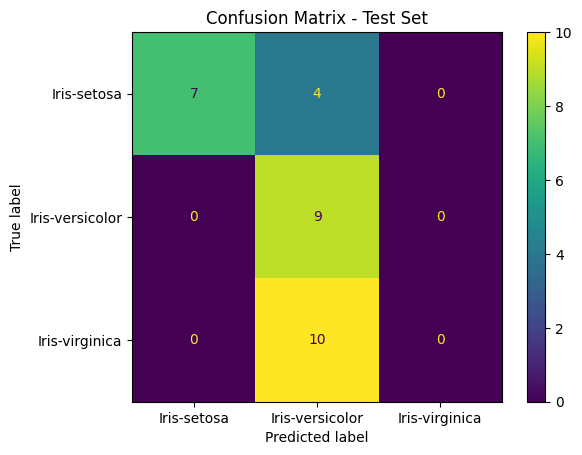

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris

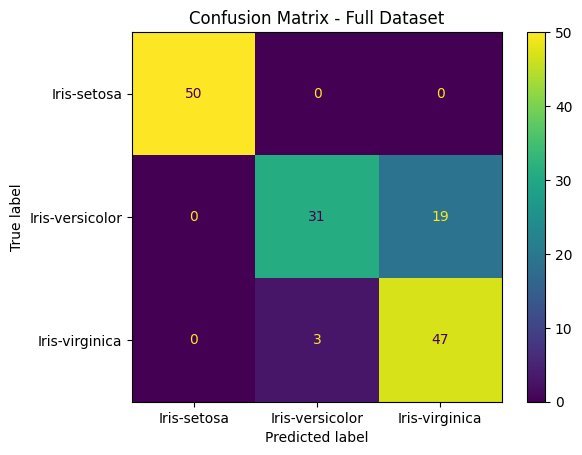

In [22]:
import dis
from sklearn.metrics import ConfusionMatrixDisplay

df = pd.read_csv('input/Iris.csv')
print(df.head())

clf = MiniBatchGD(path='input/Iris.csv')
clf.fit(
        y_index=4, 
        lines=batch_size, 
        validation_size=0.1,
        epochs=1000, 
        eta=0.1,
        early_stopping_rounds=10,
        min_epochs=50,
        min_delta=0.001,
        verbose=False
    )

# Now predict_categories returns numeric predictions
y_pred_test = clf.predict(clf.X_test)
print(y_pred_test)

# Display confusion matrix for test set
ConfusionMatrixDisplay.from_predictions(clf.y_test, y_pred_test,display_labels=clf.category_map.keys())
plt.title("Confusion Matrix - Test Set")
plt.show()

# Over the whole dataset
features = df.columns.tolist()
features.remove('species')
X = df[features].to_numpy()

# Get original labels as numeric
y = df['species']
# Predict using the full dataset
y_pred = clf.predict_categories(X)
print(y_pred)
ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.title("Confusion Matrix - Full Dataset")
plt.show()

In [ ]:
from sklearn.metrics import recall_score,accuracy_score

print(y, y_pred)
recall_score(y_true=y, y_pred=y_pred,average=None)
accuracy_score(y_true=y, y_pred=y_pred)


# We perform well for 2 classes with a very high recall
# Our accuracy is also decent with 83% of instances being classified correctly

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris

0.8533333333333334